<h1><center>Tarea 5 -Procesamiento de imágenes

<center>Kin Nevárez<center>
    
<center>26 de junio 2022<center>

<center>Facultad de Ciencias Físico Matemáticas<center>

<center>Maestría en Ciencia de Datos<center>

___

# 1. Resumen

El código a continuación es una ejemplificación de diferentes tipos de procesamiento que se pueden hacer a imágenes con el objetivo de entrenar posteriormente un modelo que identifique y detecte emociones en rostros de personas.

El ejemplo se realizará con una sola imagen obtenida manualmente (tomando una foto a una persona sonriendo).

______________

# 2. Establecimiento del espacio de trabajo

Se importan las librerías necesarias para las funciones utilizadas.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib as plt

___

# 3. Acceso a los datos

Se lee una imagen:

In [3]:
import os
os.chdir('/content/drive/MyDrive/MAESTRÍA/TETRAMESTRE 4/PROCESAMIENTO Y CLASIFICACIÓN/TAREA 5')

In [4]:
with Image.open('imagen_kin.JPG') as img:
  img.load()

type(img)

PIL.JpegImagePlugin.JpegImageFile

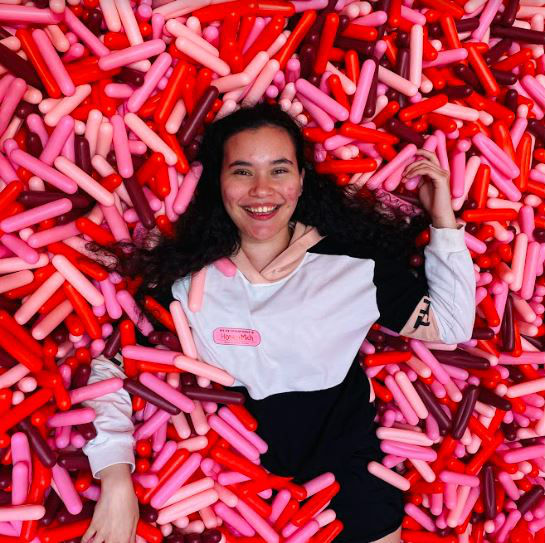

In [5]:
img

In [6]:
print('Tamaño:',img.size)
print('Formato:',img.format)
print('Modo:',img.mode)

Tamaño: (545, 543)
Formato: JPEG
Modo: RGB


Se observa que la imagen es de tamaño mediano, tiene formato JPEG y está en modo RGB (a color) lo que singifica que tiene tres canales.

___

# 4. Operaciones básicas con Pillow

### 4.1 Cortar imagen (Crop)

Si se requieren tomar ciertas partes específicas de la imagen, se puede hacer lo siguiente:

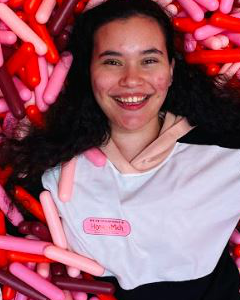

In [7]:
cropped_image = img.crop((130,110,370,410))
cropped_image

In [8]:
print('Tamaño:',cropped_image.size)
print('Formato:',cropped_image.format)
print('Modo:',cropped_image.mode)

Tamaño: (240, 300)
Formato: None
Modo: RGB


Tomando en cuenta que se trató de ajustar la imagen para que aparezca solo el contorno del cuerpo, se ha eliminado el ruido de fondo y el tamaño ahora es equivalente a lo que se retiró de la imagen. Esto tiene el objetivo de tomar solamente aquellas características que parezcan relevantas para detectar la emoción de una persona, por lo que el fondo sería ruido para un modelo de clasificación de rostros.

### 4.2 Cambiar tamaño (Resize)

Una vez teniendo la imagen recortando solo lo que es de interés (en este caso el contorno del cuerpo sin el fondo, haciendo énfasis en el rostro), se puede cambiar el tamaño haciendo más grande o más pequeña la imagen, según se desee.

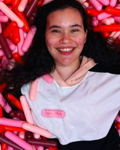

In [9]:
reduced_image = cropped_image.resize((cropped_image.width // 2,cropped_image.height // 2))
reduced_image

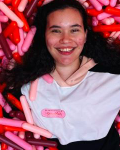

In [10]:
reduced_image2 = cropped_image.reduce(2)
reduced_image2

Ambas funciones dan resultados iguales porque el primero reduce la imagen por separado para el alto y el ancho haciendo una división, mientras que el segundo reduce la imagen igual tanto para el alto como para el ancho.

In [11]:
print('Tamaño:',reduced_image.size)
print('Formato:',reduced_image.format)
print('Modo:',reduced_image.mode)

Tamaño: (120, 150)
Formato: None
Modo: RGB


Se dividó entre 2 el tamaño de la imagen cortada. La razón de cambiar el tamaño, lo que en este caso es reducir la imagen, es debido a que en un futuro, cuando se estén realizando operaciones de cómputo a gran escala con miles o millones de imágenes el tiempo de ejecución no se vea afectado al tener imágenes con tamaños muy grandes. Se pueden obtener buenos resultados con imágenes de tamaño mediano o chico, extrayendo las características correctas de ella.

_______

# 5. Manipulación básica de imágenes


### 5.1 Transponer (Transpose)

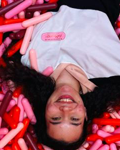

In [12]:
trsp_image = reduced_image.transpose(Image.FLIP_TOP_BOTTOM)
trsp_image

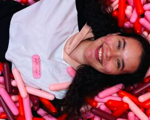

In [13]:
trsv_image = reduced_image.transpose(Image.TRANSVERSE)
trsv_image

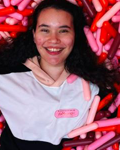

In [14]:
mirr_image = reduced_image.transpose(Image.FLIP_LEFT_RIGHT)
mirr_image

Existen muchas maneras de transponer una imagen y dependiendo del objetivo final es el tipo de procesamiento que se le hará. Por ejemplo, al tener un problema de clasificación de imágenes una buena manera de agregar información para entrenar al algoritmo es transponer imágenes y agregarlas al conjunto de datos para que de esta forma el modelo tenga más información de la cual aprender.

### 5.2 Rotar (Rotate)

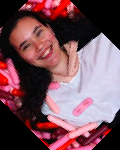

In [15]:
rot_image = reduced_image.rotate(45)
rot_image

Al rotar una imagen, se está haciendo el mismo efecto mencionado en el apartado anterior. Es una manera artificial de generar ruido y de hacer que el modelo que se vaya a entrenar tenga más información útil con la que comparar.

___

# 6. Otro tipo de manipulación de imágenes

### 6.1 Escala de grises

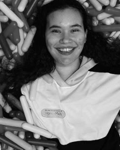

In [16]:
gray_image = reduced_image.convert('L')
gray_image

### 6.2 Blurring, Sharpening, Smoothing.


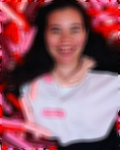

In [17]:
blur_image = reduced_image.filter(ImageFilter.BLUR)
blur_image

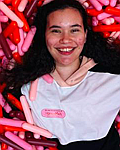

In [18]:
sharp_image = reduced_image.filter(ImageFilter.SHARPEN)
sharp_image

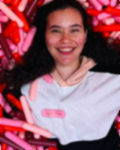

In [19]:
smooth_image = reduced_image.filter(ImageFilter.SMOOTH)
smooth_image

### 6.3 Descomponer imagen (split)


In [20]:
red, green, blue = smooth_image.split()

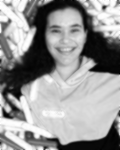

In [21]:
red

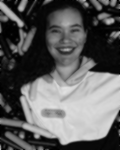

In [22]:
green

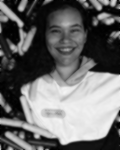

In [23]:
blue

Al descomponer la imagen en los tres canales, se observa que el canal verde es el que tiene más contraste en cuanto a las facciones de la cara (ojos, labios, sonrisa, etc.) lo que puede ayudar a detectar de mejor manera la emoción que está sintiendo esta persona.

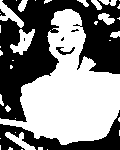

In [24]:
threshold = 70
trsh_image = green.point(lambda x: 255 if x > threshold else 0)
trsh_image = trsh_image.convert('1')
trsh_image

En esta última celda de código, se está convirtiendo la imagen a blanco y negro. Se convierten a blanco (1) todos los pixeles que estén por encima del umbral de 80 en el canal verde y en negro (0) todos los que estén por debajo. Así se genera aúnmás contraste y se observan las facciones principales de una persona sonriendo (ojos rasgados, la nariz se ensancha un poco y se muestran los dientes de una sonrisa).

Para otros tipos de imagen, es posible que el umbral se tenga que modificar o ajustar manualmente.

### 6.4 Detección de bordes, mejora de bordes y embossing.

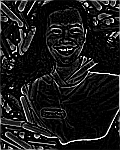

In [25]:
edges_image = gray_image.filter(ImageFilter.FIND_EDGES)
edges_image

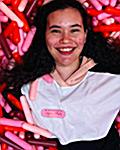

In [26]:
edge_enh_image = smooth_image.filter(ImageFilter.EDGE_ENHANCE)
edge_enh_image

# 7 Segmentación de imagen

Se creará una especie de "photoshop" con las funciones que se pueden construir 
en Python.

In [27]:
def erode(cycles,image):
  for _ in range(cycles):
    image = image.filter(ImageFilter.MinFilter(3))
  return image

def dilate(cycles,image):
  for _ in range(cycles):
    image = image.filter(ImageFilter.MaxFilter(3))
  return image

### 7.1 Erode

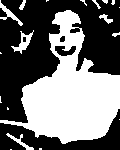

In [28]:
step1 = erode(1,trsh_image)
step1

### 7.2 Dilate

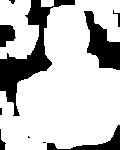

In [29]:
step2 = dilate(5,step1)
step2

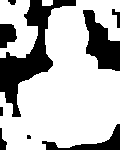

In [30]:
mask = erode(1,step2)
mask

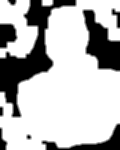

In [31]:
mask2 = mask.convert('L')
mask3 = mask2.filter(ImageFilter.BoxBlur(1))
mask3

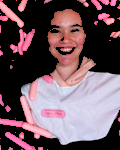

In [32]:
blank = reduced_image.point(lambda _:0)
segmented = Image.composite(reduced_image,blank,trsh_image)
segmented

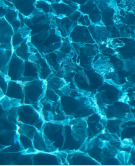

In [33]:
with Image.open('water.jpg') as bground:
  bground.load()

reduced_bround = bground.reduce(8)
reduced_bround

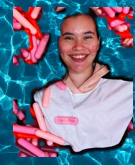

In [34]:
reduced_bround.paste(reduced_image,(13,7),mask3)
reduced_bround

En este último caso, se intentó sobreponer la imagen recortada y resaltando la máscara sobre un fondo de agua, para hacer ilusión de que la persona se encuentra nadando boca arriba. En un futuro se espera perfeccionar este tipo de ediciones.

___

# 8. Conclusión

Los tipos de procesamiento que se vieron en este código sirven como paso previo al modelo de clasificación de imágenes que se mencionó en el apartado de Resumen. Existen muchos tipos de pre procesamiento, en este ejercicio se vieron solo algunos (los más usados) pero vale la pena entender qué hace cada uno y para qué servirían en un determinado problema.
